# Geometrical Methods in Machine Learning

## Homework 1

In [148]:
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

from sklearn.decomposition import PCA, FastICA as ICA

Consider FIFA22 players statistics dataset ``hw1/data/FIFA22.csv``.

The dataset have the following feature groups (from left to right):
- ``Name`` to ``Club Logo`` - use them only for the visualization purposes,
- ``Value``, ``Wage`` - consider them for the interpretation task, remove from consideration for the regression task,
- ``Preferred Foot``, ``Best Position``, ``Body Type`` - categorical variables,
- ``Age`` to ``DefensiveAwareness`` - numerical variables.


Process dataset by:
- converting string values to numbers in the columns ``Value``, ``Wage``, ``Height``, ``Weight``,
- inputing `nan`'s if any,

### Task 1: PCA + interpretation (3 points)

Apply PCA analysis to data to find PCA estimate of data dimensionality given by the number of variables explaining 80% and 95% of the variance.

Draw and interpret biplots of the first two principal components and top 5 features with the highest influence (largest absolute eigenvalue coefficient) to each first two principal components. 

Comment whether PCA is applicable to categorical variables, as well as your preprocessing strategy for them.

In [1]:
# your code here

### Task 2: PCA + regression (2 points)

Consider the regression problem of predicting a target variable of _negotiation value_ of a player given by `Value` to `Wage` ratio. Apply a classifier of your choice on raw data and reduced data of various dimensions, based on raw player performance features (be sure to exclude ``Value`` and ``Wage`` features from consideration).

Perform a feature selection, selecting top 10 performing features, with any technique you know, compare them with top 10 features influencing first two principal components.

In [4]:
# your code here

### Task 3: ICA signal separation and reconstruction (3 points)

Consider the EEG dataset ``hw1/data/EEG.npy`` consisting of brain electrical activity of dimension $d=10001$ measured over time via $m=64$ electrodes. In EEG every single electrode captures activity not only in the direct vicitity, but in the neighboring areas as well, so we can of think of every electode signal as a linear mixture of local and neighboring activity, thus suiting the ICA model:

$$\mathbf{X} = \mathbf{A}\mathbf{S}$$

where $\mathbf{S} \in \mathbb{R}^{n \times d}$ - $n$ source signals of dimension $d$, $\mathbf{X} \in \mathbb{R}^{m \times d}$ - $m$ observations of dimension $d$, $\mathbf{A}$ - $m \times n$ mixing matrix, where $m \geq n, \mathrm{Rank}(\mathbf{A}) = n$.

Along with the normal brain activity, the signal may contain various artifacts, like eye blinks, seen as rapid and high amplitude noise corrupting the signal.

The task is to separate the signal from noise, given by ICA components having blinks. Find $n=40$ sources using `FastICA` from sklearn. Handpick the sources contaning blinks and remove them while reconstucting the the signals back from sources, not having the blinks. You can additionally preprocess the data with `PCA` reducing the number of signals to $m_{PCA}=48$.

**Note:** the key for the reconstruction is the mixing matrix $\mathbf{A}$, it can be found via ``ica.mixing_``.

In [149]:
X = np.load("./data/EEG.npy")

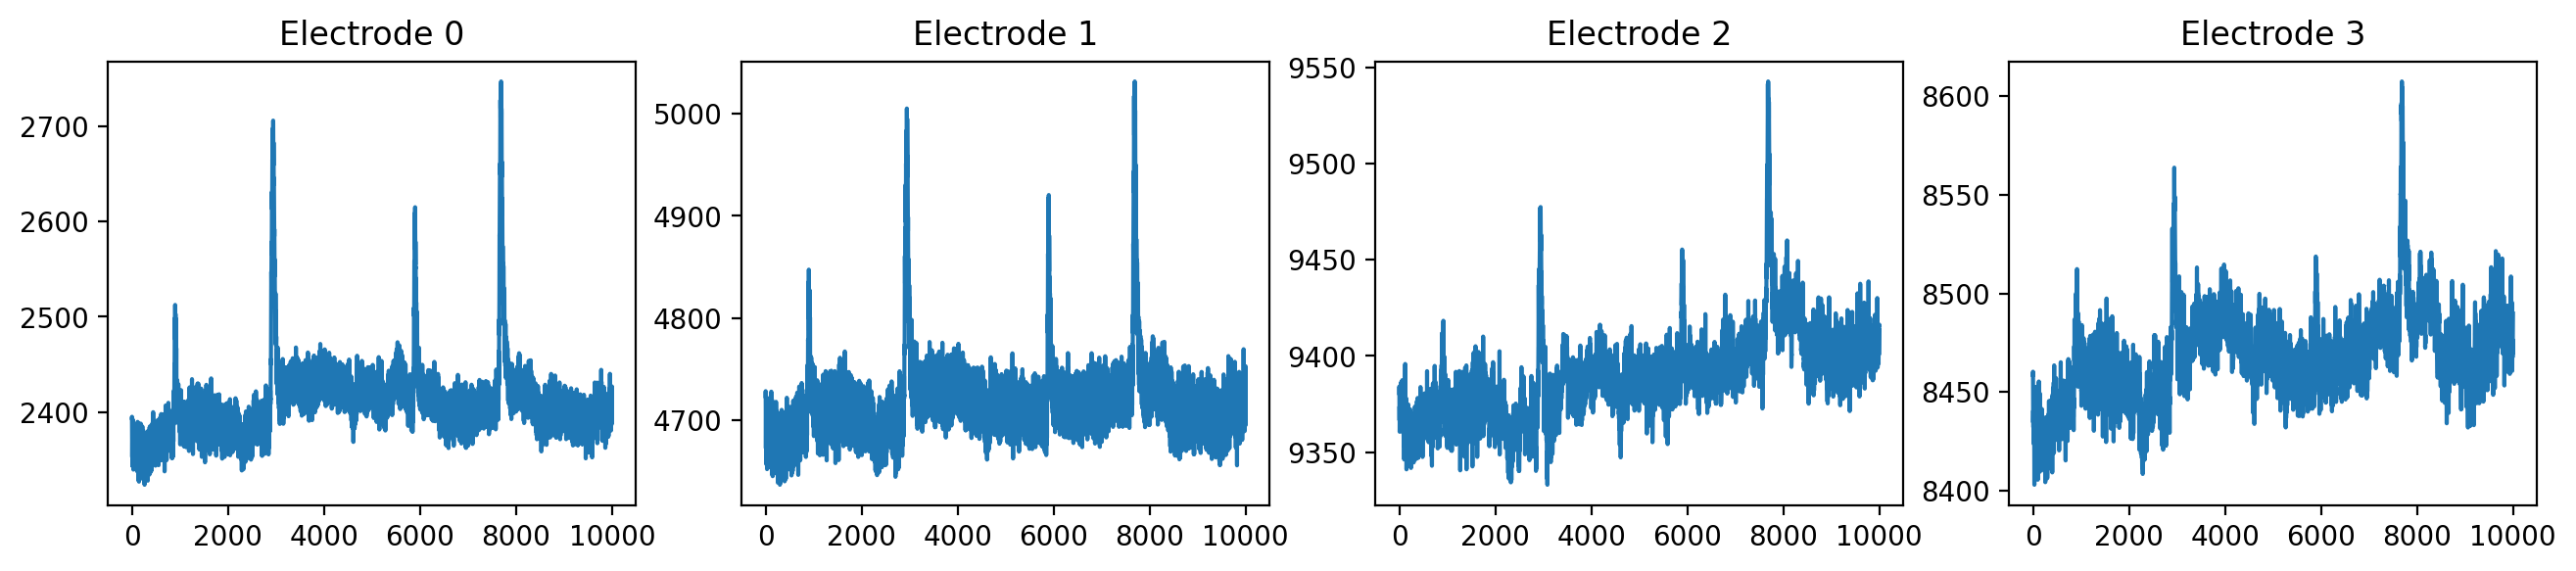

In [150]:
fig, ax = plt.subplots(1, 4, figsize=(16, 3), dpi=200)
for j in range(4):
    ax[j].set_title("Electrode {}".format(j))
    ax[j].plot(X[:,j])
plt.show()

In [151]:
# your code here

**Extra point:** apply ICA to PCA data reduced into $48$ dimensions, and perform double reconstruction:
1. ICA sources -> PCA components
2. PCA components -> original signal

The difference is that for the main task you need to perform eigher _ICA sources -> original signal_ reconstruction if you do not used PCA as preprocessing step, or _ICA sources -> PCA components_ if you apply PCA preprocessing.

In [ ]:
# your code here

#### Grading:

- 8/10 points are awarded for completing all the tasks and giving proper answers to questions.
- 2/10 points are awarded for the quality of reporting, be sure to give explanations and comments to your solutions.
- +1 extra point may be awarded for the extra work performed, be creative.